In [1]:
# Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Users\SUBHADEEP\Documents\GitHub\Stock-Price-Prediction\input\trainset.csv',index_col="Date",parse_dates=True)

In [3]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-31,3742.80,3760.00,3731.30,3738.35,1207141
2021-12-30,3681.35,3740.00,3680.00,3733.75,1966475
2021-12-29,3692.25,3719.95,3685.00,3694.70,1456923
2021-12-28,3710.00,3725.00,3693.85,3706.55,1456218
2021-12-27,3671.00,3700.00,3653.10,3696.10,1534135


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1978 entries, 2021-12-31 to 2014-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1978 non-null   float64
 1   High    1978 non-null   float64
 2   Low     1978 non-null   float64
 3   Close   1978 non-null   float64
 4   Volume  1978 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 92.7 KB


<AxesSubplot:xlabel='Date'>

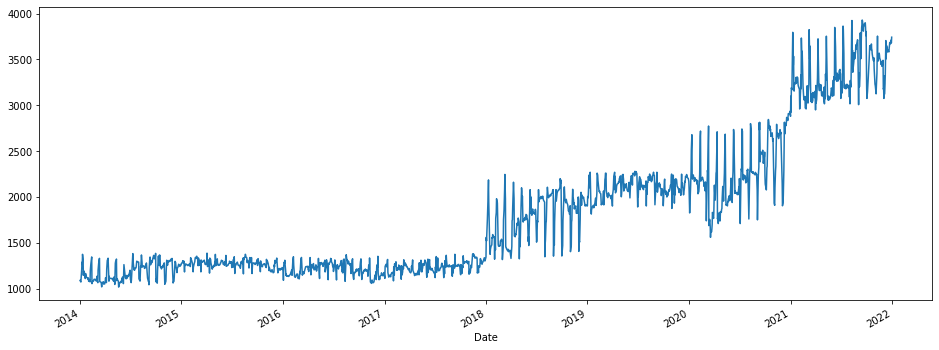

In [5]:
dataset['Open'].plot(figsize=(16,6))

In [6]:
training_set = dataset.iloc[:,1:2].values
training_set

array([[3760.  ],
       [3740.  ],
       [3719.95],
       ...,
       [1114.13],
       [1093.58],
       [1092.5 ]])

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
# Creating a data structure with 60 timestamps and 1 output
from sklearn.model_selection import train_test_split
x_test = []
y_test = []
x_train = []
y_train = []
for i in range(60,1978):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
x_train,x_test,y_train,y_test = train_test_split(np.array(x_train),np.array(y_train),test_size=0.2)


In [9]:
x_train.shape

(1534, 60)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [11]:
#RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [12]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [13]:
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(Dense(units = 1))

In [18]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [19]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
48/48 [==============================] - 7s 46ms/step - loss: 0.0112
Epoch 2/100
48/48 [==============================] - 2s 48ms/step - loss: 0.0025: 0s - loss:
Epoch 3/100
48/48 [==============================] - 2s 45ms/step - loss: 0.0024
Epoch 4/100
48/48 [==============================] - 2s 46ms/step - loss: 0.0023
Epoch 5/100
48/48 [==============================] - 2s 45ms/step - loss: 0.0022
Epoch 6/100
48/48 [==============================] - 2s 46ms/step - loss: 0.0020
Epoch 7/100
48/48 [==============================] - 2s 45ms/step - loss: 0.0020: 0s - loss - ETA: 0s - loss: 0.0
Epoch 8/100
48/48 [==============================] - 2s 46ms/step - loss: 0.0018
Epoch 9/100
48/48 [==============================] - 2s 46ms/step - loss: 0.0023: 0s - loss
Epoch 10/100
48/48 [==============================] - 2s 45ms/step - loss: 0.0015
Epoch 11/100
48/48 [==============================] - 2s 45ms/step - loss: 0.0015
Epoch 12/100
48/48 [==============================]

In [20]:
real_stock_price = x_test

In [21]:
x_test = np.array(x_test)
x_test.shape

(384, 60)

In [22]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(384, 60, 1)

In [23]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price

array([[0.07389951],
       [0.03594886],
       [0.09646583],
       [0.9470253 ],
       [0.08175503],
       [0.34291655],
       [0.4018395 ],
       [0.09046398],
       [0.09709413],
       [0.3848936 ],
       [0.2468672 ],
       [0.09937403],
       [0.41601372],
       [0.2833763 ],
       [0.29679924],
       [0.08674903],
       [0.15438342],
       [0.7654619 ],
       [0.07197906],
       [0.01991318],
       [0.0956623 ],
       [0.08282648],
       [0.28104177],
       [0.2786125 ],
       [0.07173337],
       [0.69330937],
       [0.02056061],
       [0.09800466],
       [0.17349161],
       [0.57548624],
       [0.9377675 ],
       [0.29884246],
       [0.08638185],
       [0.0798071 ],
       [0.06806907],
       [0.34718302],
       [0.04201443],
       [0.7310901 ],
       [0.08766957],
       [0.701775  ],
       [0.08083917],
       [0.03883126],
       [0.11725974],
       [0.24659285],
       [0.10608806],
       [0.05578616],
       [0.04998565],
       [0.707

In [24]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[1257.0701],
       [1145.0815],
       [1323.661 ],
       [3833.577 ],
       [1280.251 ],
       [2050.9124],
       [2224.788 ],
       [1305.9502],
       [1325.5151],
       [2174.7825],
       [1767.4803],
       [1332.2428],
       [2266.6147],
       [1875.2152],
       [1914.8248],
       [1294.9878],
       [1494.5701],
       [3297.8015],
       [1251.4031],
       [1097.7618],
       [1321.2899],
       [1283.4127],
       [1868.3262],
       [1861.1576],
       [1250.678 ],
       [3084.8867],
       [1099.6724],
       [1328.2019],
       [1550.9563],
       [2737.2024],
       [3806.258 ],
       [1920.8542],
       [1293.9042],
       [1274.5028],
       [1239.865 ],
       [2063.5024],
       [1162.9805],
       [3196.374 ],
       [1297.7041],
       [3109.868 ],
       [1277.5483],
       [1153.5872],
       [1385.0217],
       [1766.6709],
       [1352.0553],
       [1203.6194],
       [1186.5026],
       [3127.4458],
       [2366.8394],
       [3204.2751],


In [25]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       384 non-null    float32
dtypes: float32(1)
memory usage: 1.6 KB


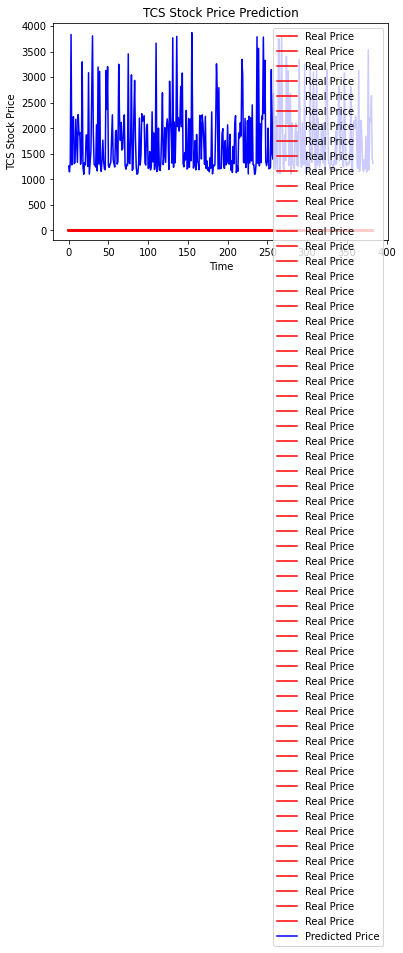

In [26]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()